 #### Example: Estimate excess Gibbs energy model parameters from binary Pxy data

Consider a binary mixture of Benzene(1)/Cyclohexane(2) at T = 283.15K

In [33]:
# include code -
include("Example.jl");

In [6]:
# Load the experimental data -
data_table = load_experimental_data_file("./data/Data.csv") # P has units of kPa

,x,y,P
,Float64,Float64,Float64
1,0.0,0.0,6.344
2,0.061,0.0953,6.59
3,0.2149,0.271,6.98
4,0.3187,0.36,7.14
5,0.432,0.4453,7.171
6,0.5246,0.5106,7.216
7,0.6117,0.5735,7.14
8,0.7265,0.6626,6.974
9,0.804,0.7213,6.845


##### Solution:
To estimate the parameters that appear in $G^{E}$ models for the activity coefficients, we'll minimize the sum of the squared differences between the measured pressure and the model calculated pressure $P_{m}$:

\begin{equation}
\mathcal{O}=\sum_{i=1}^{\mathcal{E}}\left(P_{i} - P_{m,i}\right)^{2}
\end{equation}

where we sum over composition and the model pressure is given by:

\begin{equation}
P_{m,i} = \gamma_{1,i}x_{1,i}P_{1}^{sat}+\gamma_{2,i}x_{2,i}P_{2}^{sat}
\end{equation}

The functional form of the $\gamma_{i}$ terms depends upon the model chosen for $G^{E}$; there are many models, some more complicated than others. For this example, let's keep it simple and chose the two-suffix Margules model $G^{E}=Ax_{1}x_{2}$. We showed in lecture that:

\begin{eqnarray}
\ln\gamma_{1} &=& \frac{A}{RT}x_{2}^2\\
\ln\gamma_{2} &=& \frac{A}{RT}x_{1}^2\\
\end{eqnarray}

Substituting $\gamma_{i}$ into the $P_{m,i}$ equation gives:

\begin{equation}
P_{m,i} = x_{1,i}\exp\left(\frac{A}{RT}(1-x_{1,i})^2\right)P_{1}^{sat} + (1-x_{1,i})\exp\left(\frac{A}{RT}x_{1,i}^2\right)P_{2}^{sat}
\end{equation}

We use the [Julia Optim](https://github.com/JuliaNLSolvers) package to solve the minimization problem where we search over possible values of the model parameter $A$. We use the [Antoine Equation](https://en.wikipedia.org/wiki/Antoine_equation) and Table B.2 of SVN to estimate the $P_{j}^{sat}$ values.

In [43]:
# Estimate the parameter A -
A = solve() # units of J/mol

1-element Array{Float64,1}:
 1424.607737608114

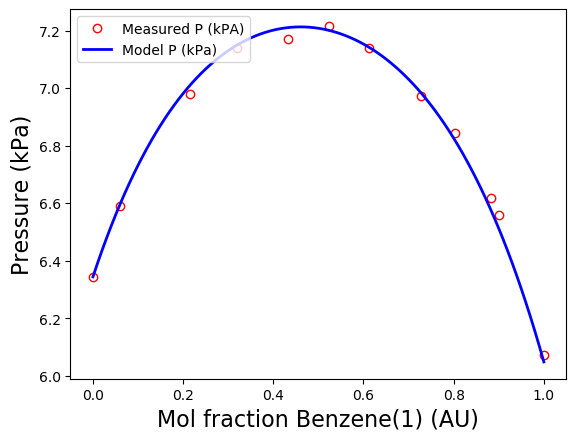

In [44]:
# Let's test how good the model is - plot the measured pressure, and the calculated pressure -

# evaluate the model using the estimated parameter -
(x1a,mpa) = evaluate_model(A)

# plot -
plot(data_table[!,:x],data_table[!,:P],"o",mfc="w",mec="r",label="Measured P (kPA)")
plot(x1a,mpa,"b",linewidth=2,label="Model P (kPa)")
xlabel("Mol fraction Benzene(1) (AU)", fontsize=16)
ylabel("Pressure (kPa)", fontsize=16)
legend(loc="upper left");

##### How much do the liquid phase non-ideality terms contribute?

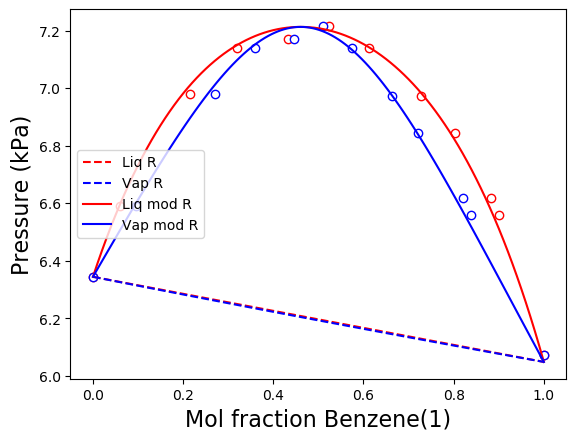

In [46]:
# let's make a Pxy diagram with Raoults law, and then mod-Raoults law -
T = 283.15 #units K

# R law -
(x1_R,y1_R,P_R) = compute_Pxy_raoults_law(T);

# mod R law -
(x1_mR,y1_mR,P_mR) = compute_Pxy_mod_raoults_law(T,A);

# plot -
plot(data_table[!,:x],data_table[!,:P],"o",mfc="w",mec="r")
plot(data_table[!,:y],data_table[!,:P],"o",mfc="w",mec="b")
plot(x1_R,P_R,"r--",label="Liq R")
plot(y1_R,P_R,"b--",label="Vap R")
plot(x1_mR,P_mR,"r",label="Liq mod R")
plot(y1_mR,P_mR,"b",label="Vap mod R")

# labels and legends -
xlabel("Mol fraction Benzene(1)", fontsize=16);
ylabel("Pressure (kPa)",fontsize=16);

# label -
legend(loc="center left");

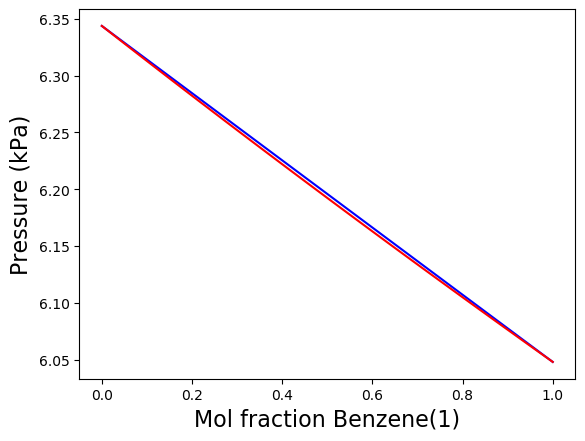

In [42]:
# plot just the R law -
plot(x1_R,P_R,"b")
plot(y1_R,P_R,"r")
xlabel("Mol fraction Benzene(1)", fontsize=16);
ylabel("Pressure (kPa)",fontsize=16);